<font size=7> Summary Statistics

In [1]:
import os
from human_hip.spike_data import summary_UUID, summary_plots, read_phy_files
from ipywidgets import interact_manual

Here we run som summary statistics on the spiked data for our **4** datasets of interest. For each dataset, we only consider the dataset which contain no drugs or pertubations. We also only consider the datasets that were curated to our liking. To get these summary statistics, we used the app below.

**Adult Dentat Gyrus** 

* Filename: hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated.zip:
* Number of spikes:  49667
* Length:  418 seconds
* Number of Neurons:  87
* Average Firing Rate:  1.36
* Coefficient of Variation:  0.546

<font color="orange">Other Notes-- the file, `hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated_neg.zip` (unused) is basically the same thing, but with half the neurons (40 removed).</font> .</font> 

**Infant Dentate Gyrus**

* Filename: hc9.19_chp-16849_plated-10.19.22_rec10.19.22_curated.zip:
* Number of spikes:  31673
* Length:  1269 seconds
* Number of Neurons:  20
* Average Firing Rate:  1.25
* Coefficient of Variation:  1.304

<font color="orange">Other Notes-- the file, `hc9.19_chp-16849_plated-10.19.22_rec10.20.22_curated.zip` Looks potentially promissing but was not readable.</font> 

**?Anterior? CA1**

* Filename: hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip
* Number of spikes:  113477
* Length:  398 seconds
* Number of Neurons:  140
* Average Firing Rate:  2.04
* Coefficient of Variation:  0.837

<font color="orange">Other Notes-- the file, `hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated_s1.zip` (unused) is basically the same thing, but with 4 less neurons.</font> 

**?Posterior? CA1 Region**  

* Filename: hc5.2_chip18790_baseline_rec5.10.23_curated.zip:
* Number of spikes:  21773
* Length:  107 seconds
* Number of Neurons:  101
* Average Firing Rate:  2.01
* Coefficient of Variation:  0.595

<font color="orange">Other Notes-- the file,`hc5.2_chip18790_baseline_rec5.10.23_curated_s1.zip` (unused) is basically the same thing, but with 1 less neuron.</font> 




## Text Summary

This function produces a summerary of all <b>curated</b> recordings in a folder. The information provided is as follows:
   - Name of the file from which we are displaying recording data
   - Number of spikes in the recording over all Neural Units
   - Length of recording in Seconds 
   - Number of Neural Units in recording deemed significant after curation
   - Averarge firing rate of tissue sample in spikes per second
   - Coefficent of Variation for recording, values being close to 1 signifying random firing and smaller values signifying less randomness in firing patterns
   
To use this function, run the cell below and use the interact widget to select the folder you wish to analyse, then hit the <b>Run Interact</b> button to display the information. Displays in order of appearance in directory. 

In [2]:
data_folders = os.listdir("/workspaces/human_hippocampus/data/ephys/")
interact_manual( summary_UUID, folder_name=data_folders ) 

interactive(children=(Dropdown(description='folder_name', options=('2023-05-10-e-hc52_18790', '2022-10-20-e-',…

<function human_hip.spike_data.summary_text.summary_UUID(folder_name, data_path='/workspaces/human_hippocampus/data/ephys')>

## Basic Plots

This function provides two figures from a selected <b>curated</b> recording. The first figure is comprised of four subplots that depict the distrobution of interspike intervals, the distrobution of neural unit firing rate as a histogram and also ploted onto the neuron layout, and finally the spike raster of the first 30 seconds of the recording with the firing rate drawn over it. The second figure is the individual interspike intervals of the first 8 Neural Units. If there are less than 8 units in a curated sample the plot will display the total amount of units along with a warning that the Neural Unit count is under 8. To use this function, run the cell below and use the interact widget to select the file you wish to analyse, then hit the <b>Run Interact</b> button to display the figures.

In [4]:
#interact_manual( summary_UUID, filename=filenames)

NameError: name 'filenames' is not defined

In [2]:
%run "/workspaces/human_hippocampus/dev/elliott/spike_data/Ari/basics_source_code.ipynb" 

Loading analysis source code...
	Done!


/srv/conda/envs/notebook/lib/python3.10/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [2]:
sd =  read_phy_files( "/workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/derived/kilosort2/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated.zip" )

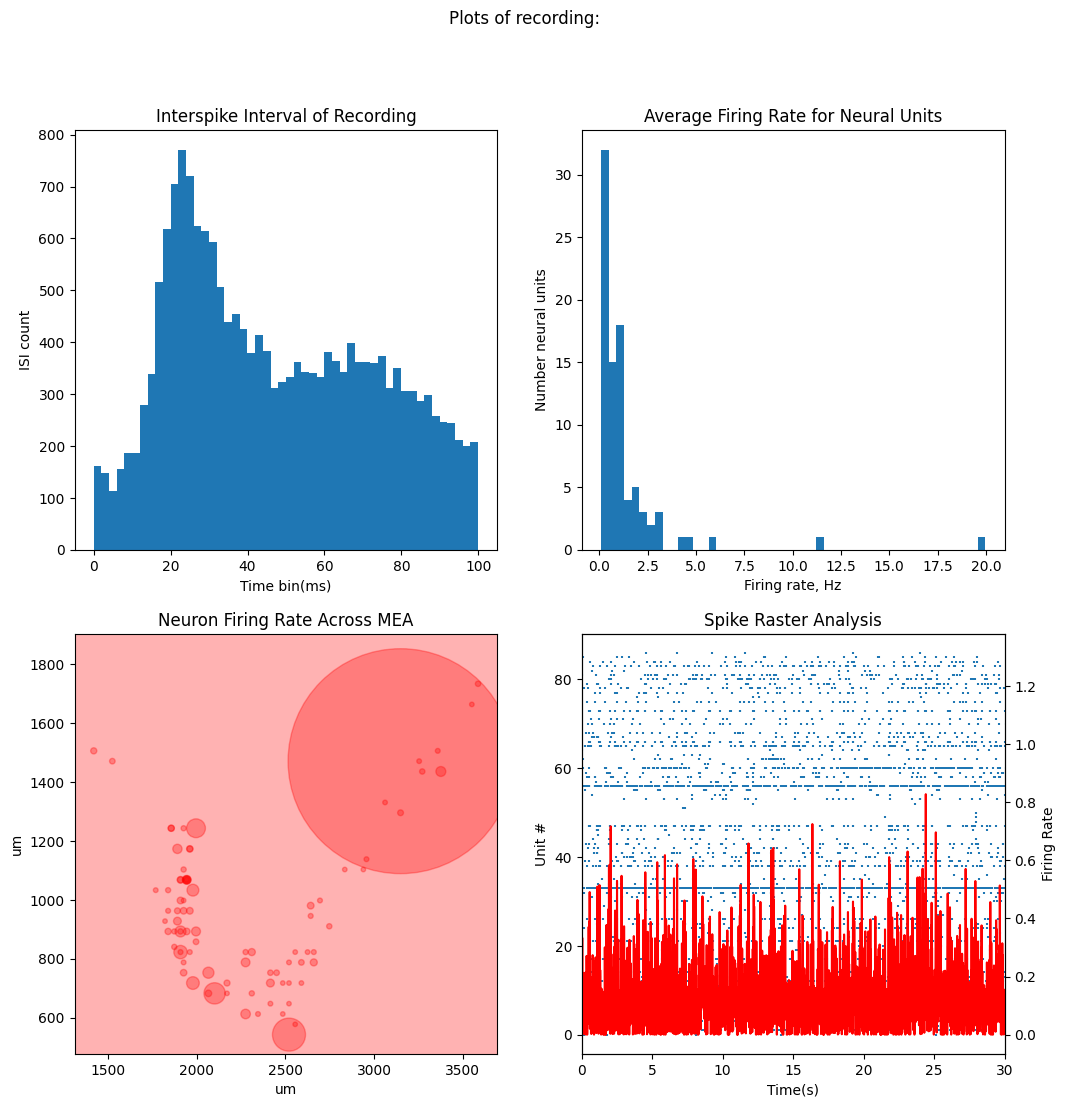

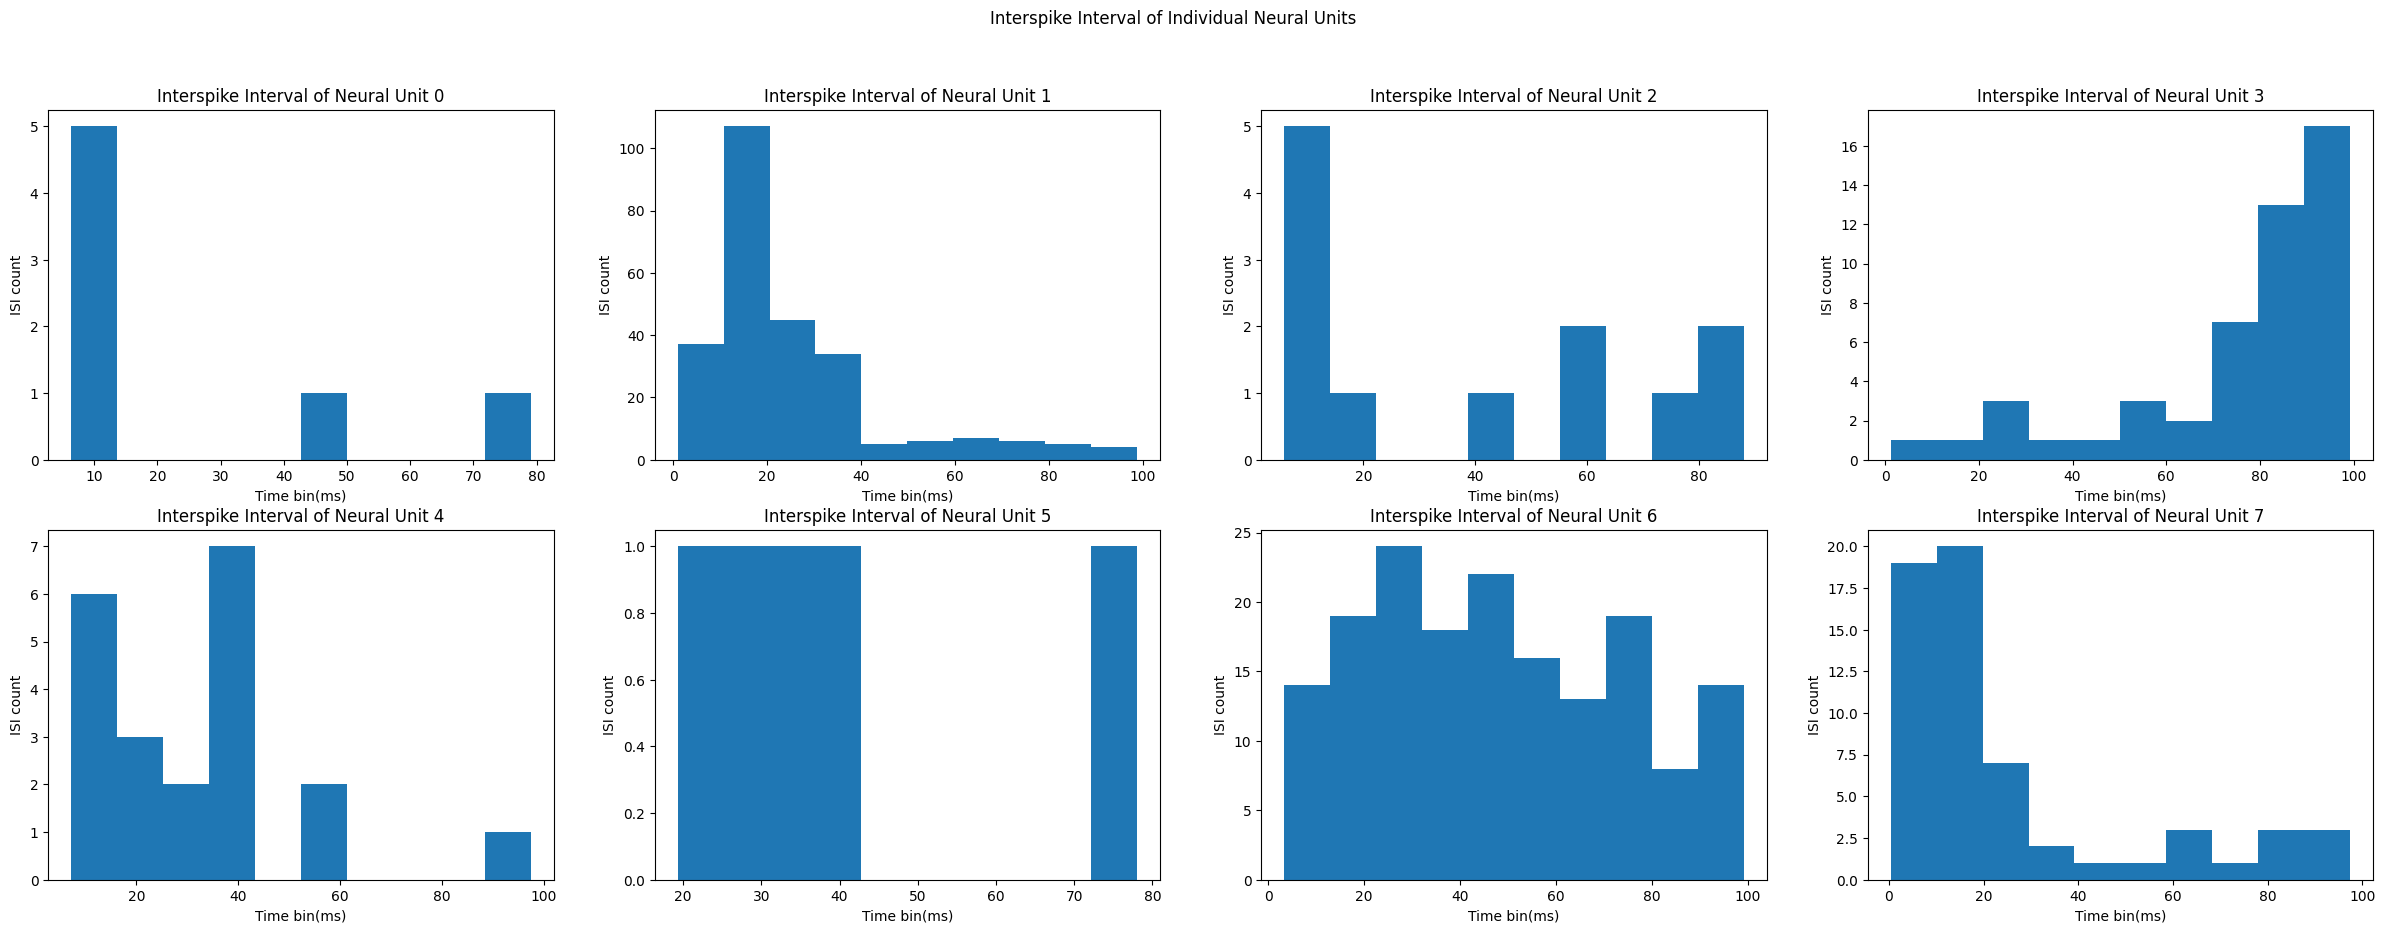

In [3]:
summary_plots( sd )

In [21]:
def ISI(sd, neuron=-1, max_isi=100):

    if neuron == -1:
        isis_raw = sd.interspike_intervals()
        isis=[]
        for isis_neuron in isis_raw:   
            isis = isis + isis_neuron[isis_neuron<max_isi].tolist() 

    else:
        isis_neuron = sd.interspike_intervals()[neuron]
        isis = isis_neuron[isis_neuron<max_isi].tolist() 
        
    return isis

# <font color="brown"> OLD = Load datasets

Load dentate gyrus data

In [23]:
sd_dg = read_phy_files( "/workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/derived/kilosort2/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated.zip" )


Load Ca1 Data

In [24]:
file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/StitchedDataUpdated.pkl', 'rb' )
sd_ca1 = pickle.load(file)
file.close()

load unknown data

In [26]:
file = open('/workspaces/human_hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/5-10-23s1-CutData.pkl', 'rb' )
sd_na = pickle.load(file)
file.close()